In [15]:
import numpy as np


def python_articles_on_google_scholar() -> None:
    import matplotlib.pyplot as plt
    import requests_cache
    import bs4
    import re

    years = list(range(2000, 2023))
    counts = []

    session = requests_cache.CachedSession(
        backend=requests_cache.backends.sqlite.SQLiteCache(),
    )

    for i in years:
        response = session.get(
            f"https://scholar.google.com/scholar?hl=en&as_sdt=0%2C5&as_ylo={i}&as_yhi={i}&q=python+language&btnG=",
            headers={
                "Host": "scholar.google.com",
                "User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/112.0",
                "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
                "Accept-Language": "en-US,en;q=0.5",
                "Accept-Encoding": "gzip, deflate, br",
                "Alt-Used": "scholar.google.com",
                "Connection": "keep-alive",
                "Cookie": "AEC=AUEFqZcS1wAUDhLswWFQpESokDktIjmxJB9cj8chsG8zV-yNYmkH0B3Sdt4; CONSENT=PENDING+606; SOCS=CAISHAgCEhJnd3NfMjAyMzAzMjgtMF9SQzEaAnBsIAEaBgiAxZihBg; NID=511=dkzrUnKZ5A7uGQMRjSgb-068U5JahyxcExadkDJc6vJZIi9EOm3r1TizmL5k_1_c5bvrM7zBK81N-7QrXAgFwgXjBV0iMKI3INfMPLoyvVgIPhNnfnl-TFMqklMtE2cdOmg7RXDWLzzLOcde1KJwlL4jT6d5J5UosaoXZPOJZY4-OzHiFaJkSwmSRJ39; GSP=A=FOdU4w:CPTS=1683889390:LM=1683889390:S=KMTUzH6vIBHq72_V",
                "Upgrade-Insecure-Requests": "1",
                "Sec-Fetch-Dest": "document",
                "Sec-Fetch-Mode": "navigate",
                "Sec-Fetch-Site": "cross-site",
                "TE": "trailers",
            },
        )
        soup = bs4.BeautifulSoup(response.text)
        re_match = re.search(
            r"\d+,\d+", soup.select_one("div#gs_ab div#gs_ab_md div.gs_ab_mdw").text
        )
        assert re_match is not None
        content = re_match.group().replace(",", "")
        counts.append(int(content))

    fig = plt.figure(dpi=200, figsize=(10, 6))
    ax = plt.subplot()
    ax.plot(years, counts)
    ax.grid()
    ax.xaxis.set_ticks(years, [str(y) for y in years], rotation=-45)
    X = np.arange(0, max(counts), 5000)
    ax.yaxis.set_ticks(X, X)
    ax.yaxis.set_units("1e3")

    ax.set_ylabel("Liczba wyników", labelpad=10.0, fontsize=16, family="serif")
    ax.set_xlabel("Rok pochodzenia zasobu", labelpad=10.0, fontsize=16, family="serif")
    # ax.set_title("Wyniki wyszukiwania na Google Scholar dla hasła 'python language'", pad=20.0)


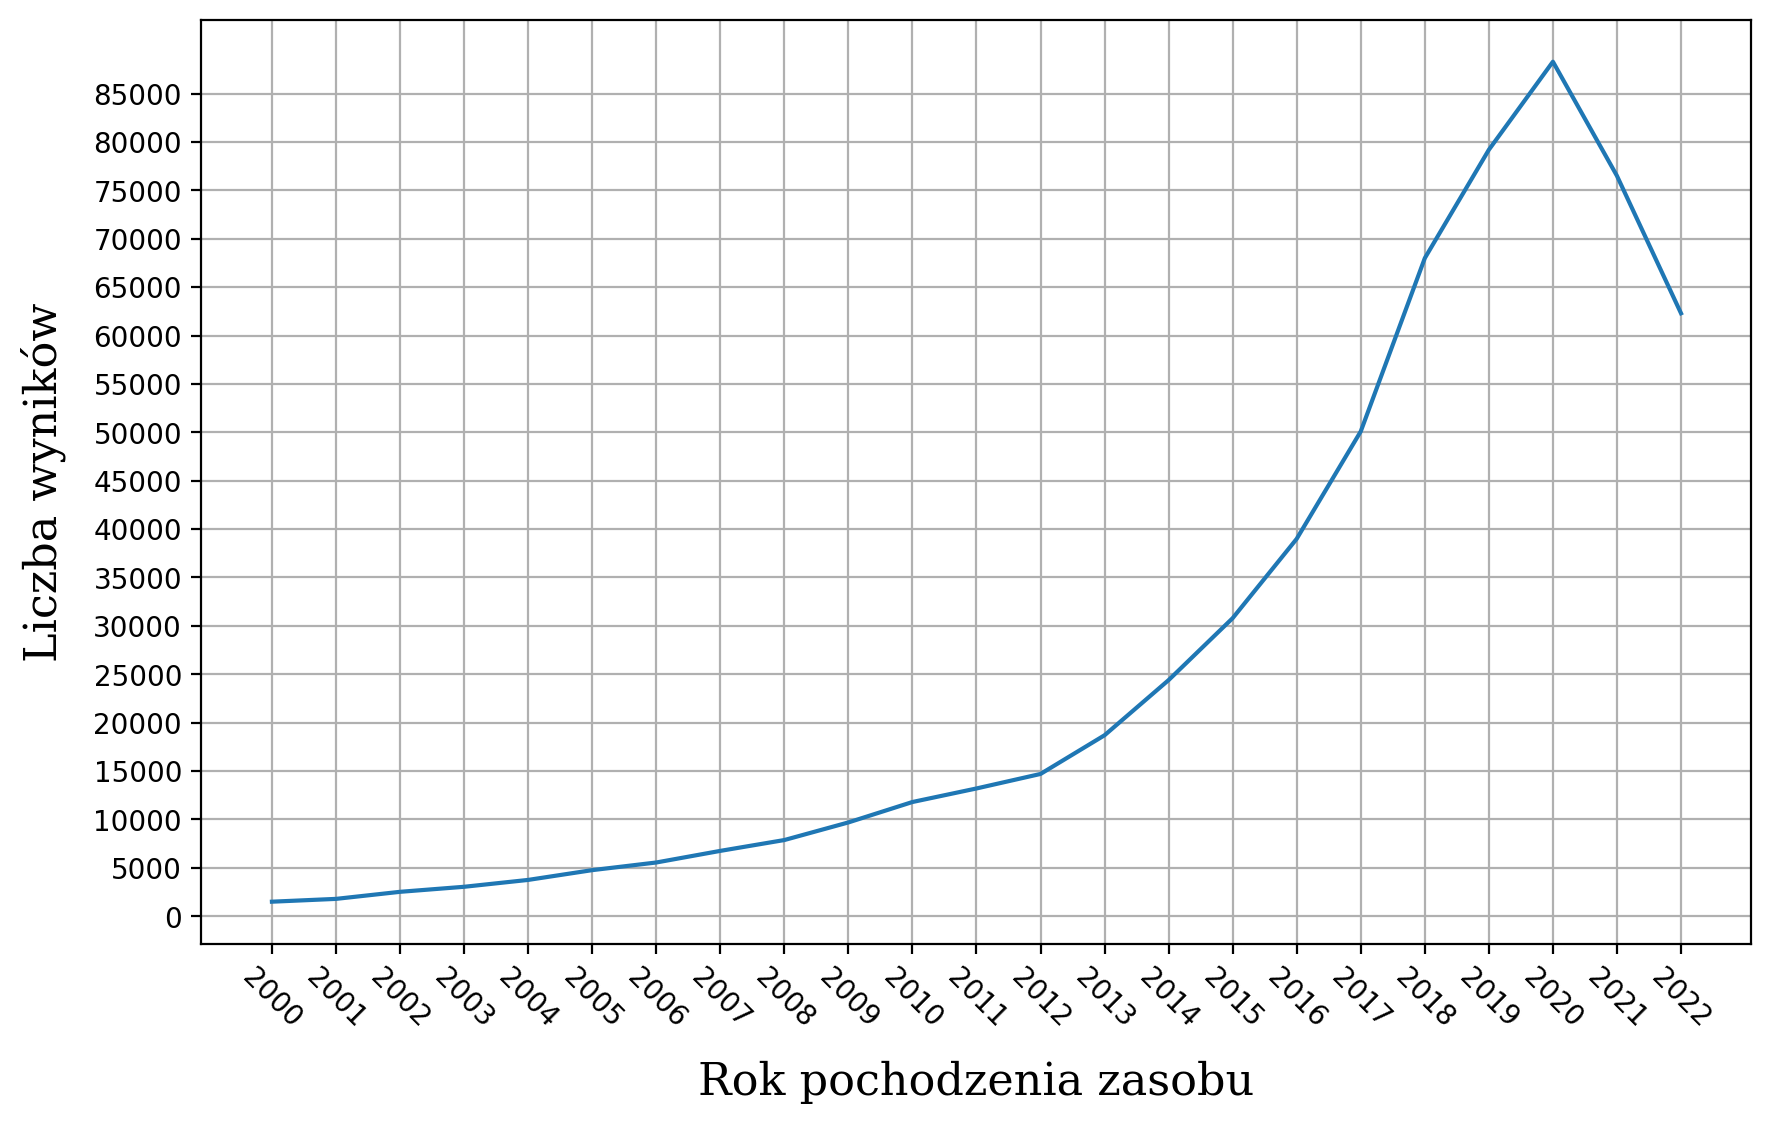

In [16]:
python_articles_on_google_scholar()
